Step 1: Data Cleaning
	1.	Price Cleanup: Remove the dollar signs from the Price column and convert the prices to numeric values.
	2.	Rating Cleanup: Extract the numeric rating values from the Rating column.
	3.	Discount Handling: Create a binary column to indicate whether a discount is available or not.

In [7]:
import pandas as pd
import re

# Load the dataset
file_path = 'GroceryDataset.csv'
grocery_data = pd.read_csv(file_path)

# Handle price ranges by averaging the numbers if there is a range
# If a price range like '32.99through-83.99' exists, we extract both numbers, compute their average, and assign it to the Price column
def extract_average_price(price):
    # Find all numeric values in the price string
    prices = re.findall(r'\d+\.\d+', str(price))
    if len(prices) == 2:
        # If there are two prices (a range), average them
        return (float(prices[0]) + float(prices[1])) / 2
    elif len(prices) == 1:
        # If there is only one price, return it
        return float(prices[0])
    else:
        return None  # Handle cases where no price is found

# Convert Price column to string and apply the function
grocery_data['Price'] = grocery_data['Price'].apply(extract_average_price)

# Extract the rating value from the Rating column
grocery_data['Rating'] = grocery_data['Rating'].str.extract(r'([0-9]\.[0-9]|[0-9])').astype(float)

# Create a binary column for discount
grocery_data['Has_Discount'] = grocery_data['Discount'].apply(lambda x: 0 if x == 'No Discount' else 1)

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'Cleaned_GroceryDataset.csv'
grocery_data.to_csv(cleaned_file_path, index=False)

# Display the cleaned data
grocery_data.head()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description,Has_Discount
0,Bakery & Desserts,56.99,No Discount,4.3,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,0
1,Bakery & Desserts,159.99,No Discount,5.0,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",0
2,Bakery & Desserts,44.99,No Discount,4.1,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,0
3,Bakery & Desserts,39.99,No Discount,4.7,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,0
4,Bakery & Desserts,59.99,No Discount,4.5,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,0


In [11]:
# Check the total number of rows in the dataset
grocery_data.shape

(1757, 9)

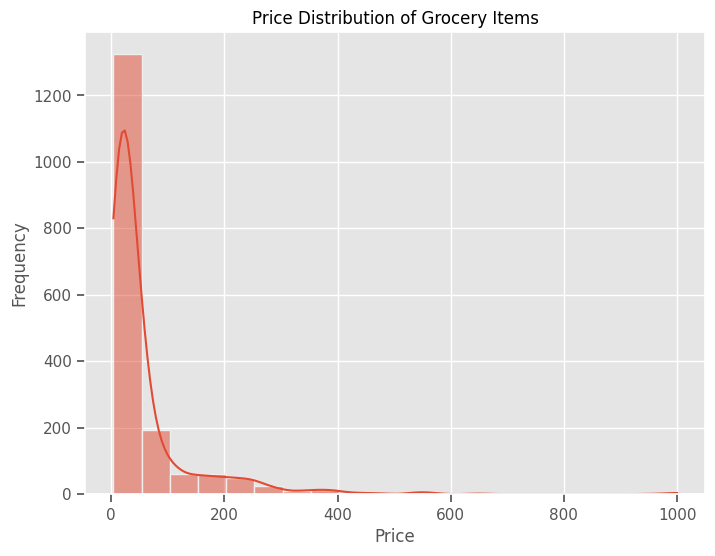

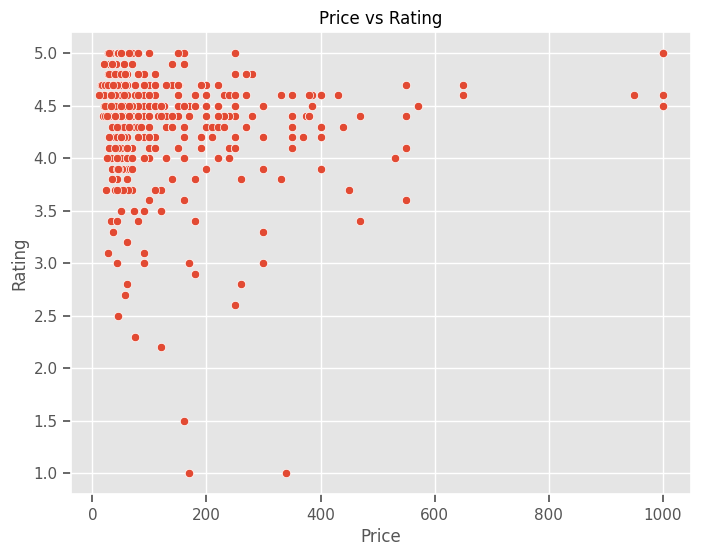

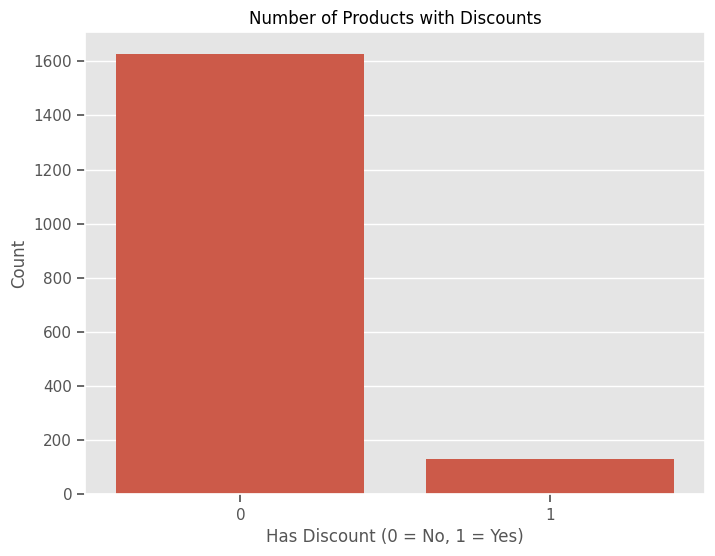

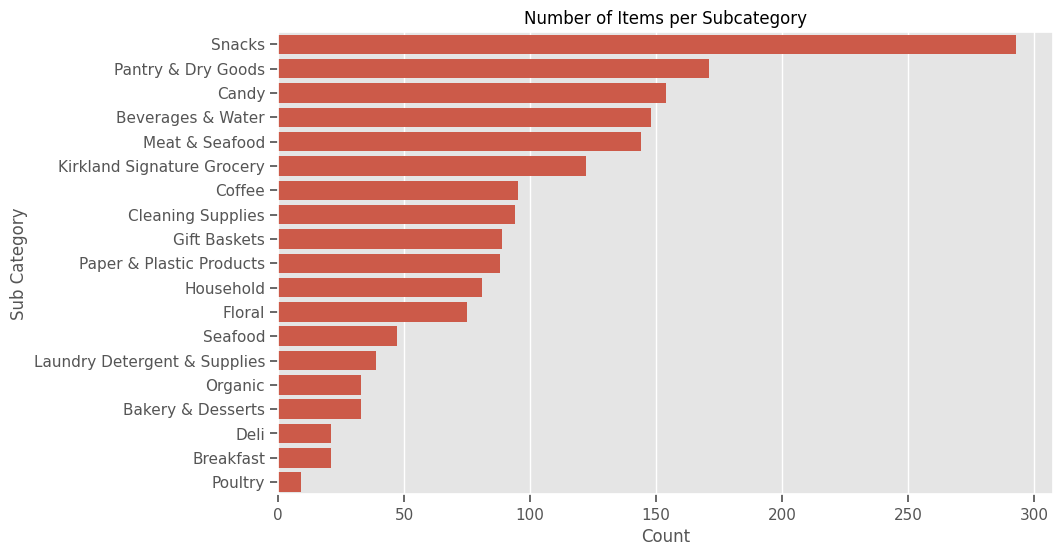

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
plt.style.use('ggplot')
sns.set_context('notebook')

# 1. Exploratory Data Analysis (EDA)

# Visualize the price distribution
plt.figure(figsize=(8, 6))
sns.histplot(grocery_data['Price'], bins=20, kde=True)
plt.title('Price Distribution of Grocery Items')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between price and ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Rating', data=grocery_data)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# Check how many products have discounts
plt.figure(figsize=(8, 6))
sns.countplot(x='Has_Discount', data=grocery_data)
plt.title('Number of Products with Discounts')
plt.xlabel('Has Discount (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 2. Visualizations

# Bar chart for the number of items per subcategory
plt.figure(figsize=(10, 6))
sns.countplot(y='Sub Category', data=grocery_data, order=grocery_data['Sub Category'].value_counts().index)
plt.title('Number of Items per Subcategory')
plt.xlabel('Count')
plt.ylabel('Sub Category')
plt.show()

## 1. Exploratory Data Analysis (EDA):

### Visualize the price distribution

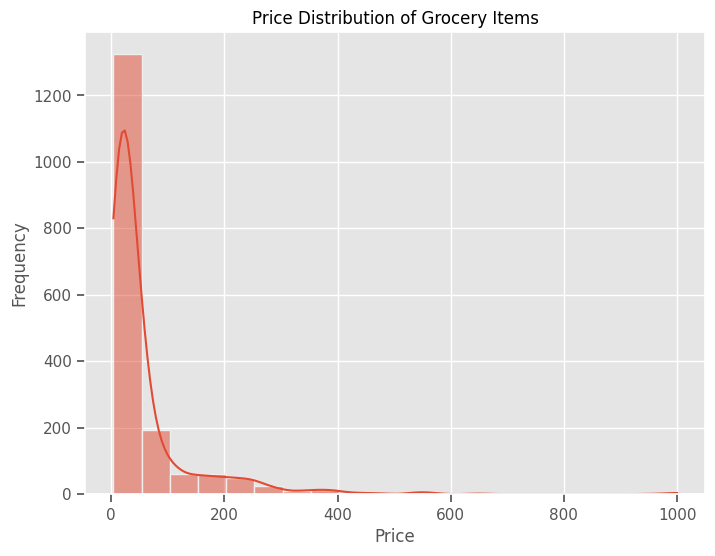

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(grocery_data['Price'], bins=20, kde=True)
plt.title('Price Distribution of Grocery Items')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Analyze the relationship between price and ratings:

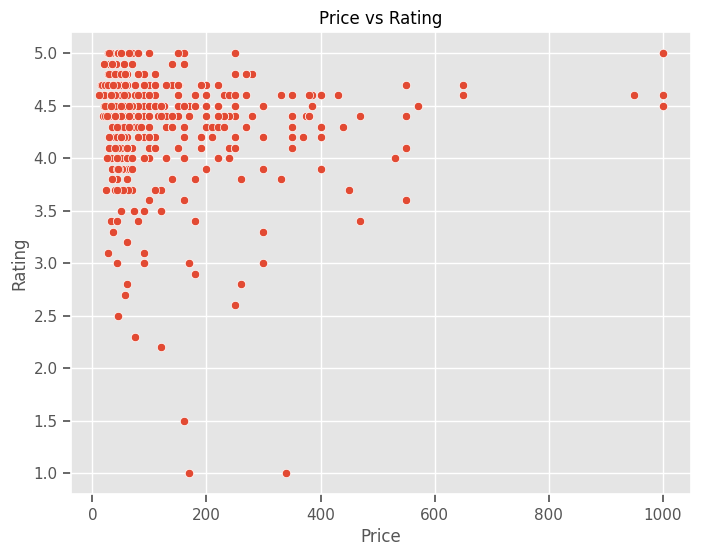

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Rating', data=grocery_data)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

### Check how many products have discounts:

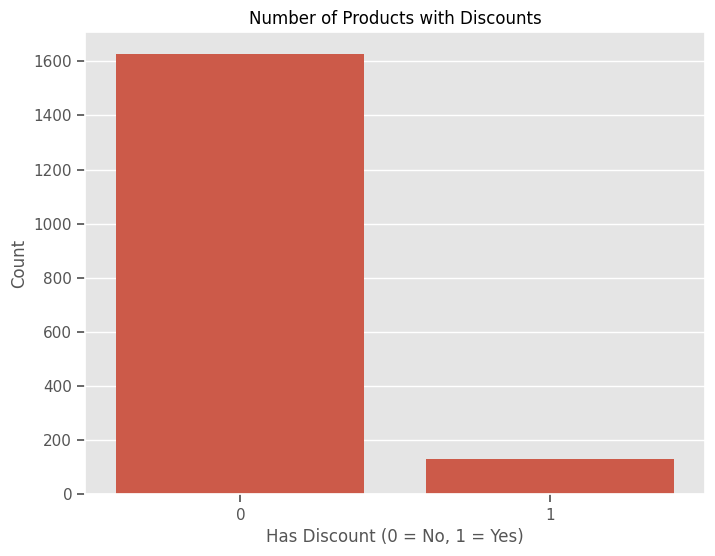

In [38]:
# Check how many products have discounts
plt.figure(figsize=(8, 6))
sns.countplot(x='Has_Discount', data=grocery_data)
plt.title('Number of Products with Discounts')
plt.xlabel('Has Discount (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## 2. Visualizations:

### Bar chart for the number of items per subcategory:

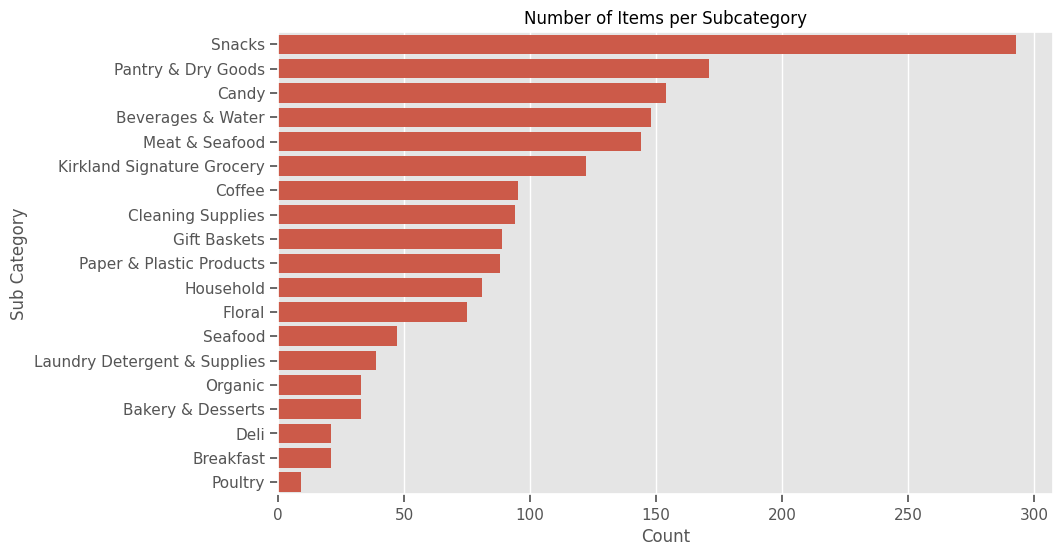

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Sub Category', data=grocery_data, order=grocery_data['Sub Category'].value_counts().index)
plt.title('Number of Items per Subcategory')
plt.xlabel('Count')
plt.ylabel('Sub Category')
plt.show()